#  Data Science Project: Planning Stage
# Problem: Predicting Usage of a Video Game Research Server
## Introduction
We are provided with two CSV files: players.csv and sessions.csv, which provide information on player demographics, game experience, subscription status, and in-game activity. And we would like to know what player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types.

### Part 1 Data Description:
#### Summary of Datasets
#### players.csv

Number of Observations: 196   

Number of Variables: 7  

Description:  

* experience: (chr) level of game experience(Pro, Veteran, Regular, Amateur)
* subscribe: (lgl) whether the player has subscribed to the game-related newsletter(True/False)
* hashedEmail: (chr) player identifier
* played_hours: (dbl) number of hours played by the player
* name: (chr) player’s name
* gender: (chr) player’s gender
* Age: (int) player’s age

#### sessions.csv
Number of Observations: 1535   

Number of Variables: 5   

Description:   
* hashedEmail:(chr) player identifier
* start_time: (chr) the timestamp when the session started
* end_time: (chr) the timestamp when the session ended
* original_start_time: (dbl) unix timestamp for start time
* original_end_time: (dbl) unix timestamp for end time

#### Issues in the Data
* Data Types: start_time and end_time were originally in chr format and need to be converted to datetime for analysis.
* Missing Values: Age has two missing values, and end_time in sessions.csv also has two missing values.
* Inconsistent Gender Labels: The gender column has 7 unique values.
  

### Part 2 Questions:
**Broad Question:**
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ among various player types?  

**Specific Question:**
Can player characteristics (experience level, total playtime, gender, and age) and gameplay behaviour (session frequency and average session duration) predict whether a player subscribes to a game-related newsletter?

**Response Variable:**
subscribe   

**Explanatory Variables:**
experience, played_hours, gender, Age, start_time, end_time 

**Data Wrangling**
1. Merging the Datasets
Use hashedEmail to merge players.csv and sessions.csv, linking each player’s characteristics with their session history.

2. Cleaning and tidying the data
* Convert start_time and end_time to datetime format.
* Compute session duration for each record (end_time - start_time).

3. Creating New Variables
* Total session count for every player
* Average session duration

4. Change data type for some variables
* We might need to convert experience (Pro, Veteran, Regular, Amateur) and gender into numerical format

### Part 3 Exploratory Data Analysis and Visualization
**Importing libraries and formatting graphs**


In [13]:
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)
library(ggplot2)

options(repr.plot.width = 12, repr.plot.height = 6)

**Importing the dataset**
We used read_csv and url form github to import our csv files.

In [14]:
players <- read.csv("https://raw.githubusercontent.com/EL2406/DSCI100/refs/heads/master/players.csv")
# players

sessions <- read.csv("https://raw.githubusercontent.com/EL2406/DSCI100/refs/heads/master/sessions.csv")
# sessions

**Compute the mean values**  

Now we compute the mean value for each quantitative variable in the players.csv data set.
Here is the table we got:  

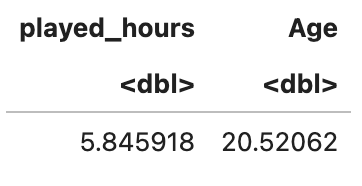

In [15]:
means <- players %>%
  select(played_hours, Age) %>%
  map_df(~ mean(.x, na.rm = TRUE))
means

played_hours,Age
<dbl>,<dbl>
5.845918,20.52062


**Exploratory visualizations of data**    

We will analyze the relationships between experience, subscribe, played_hours, gender, and age to understand which factors influence newsletter subscription.

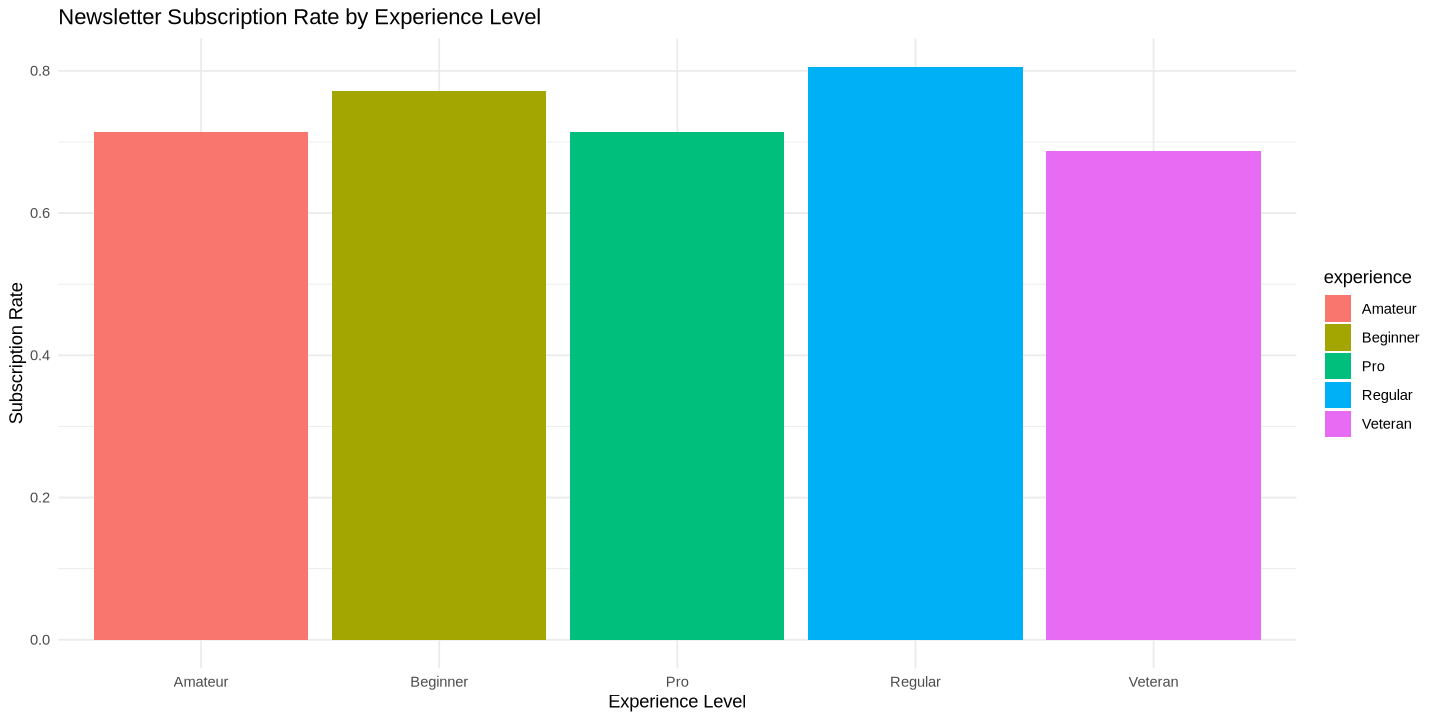

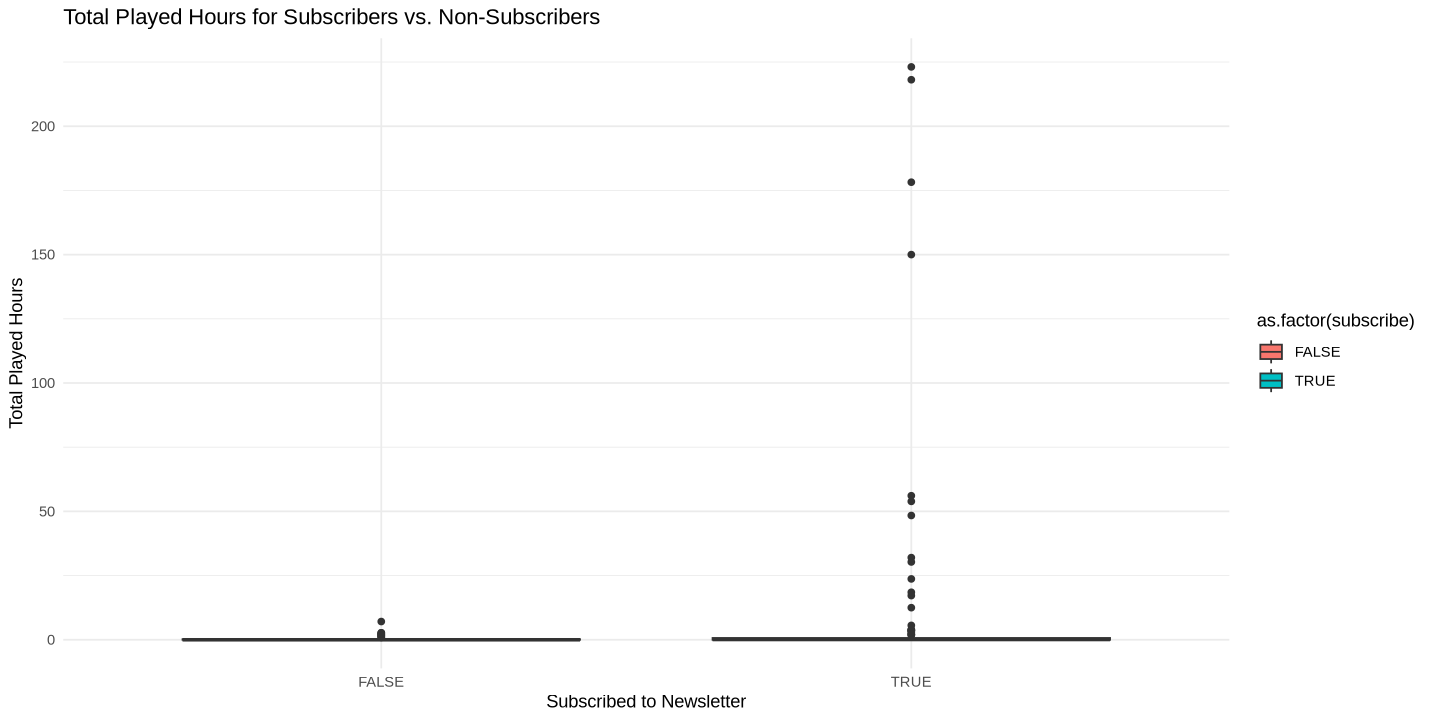

Warning message:
“Removed 2 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


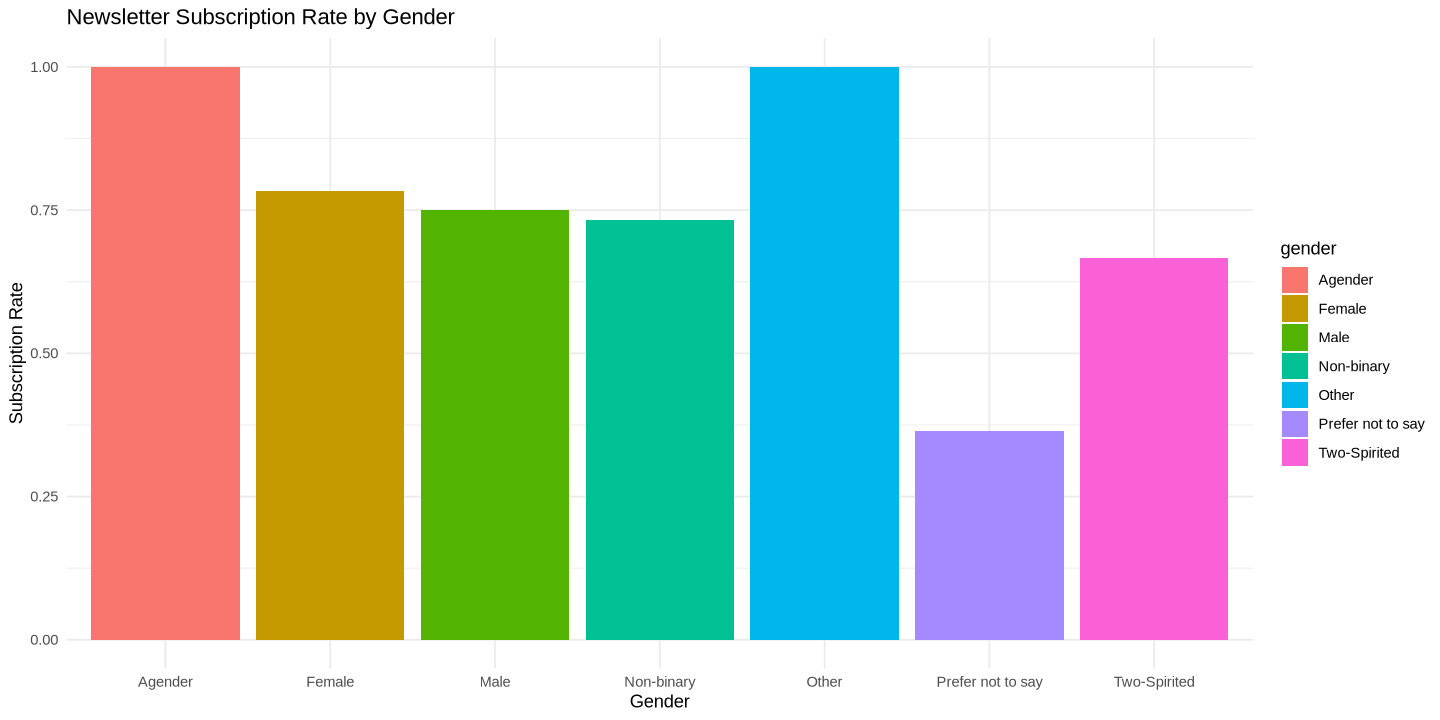

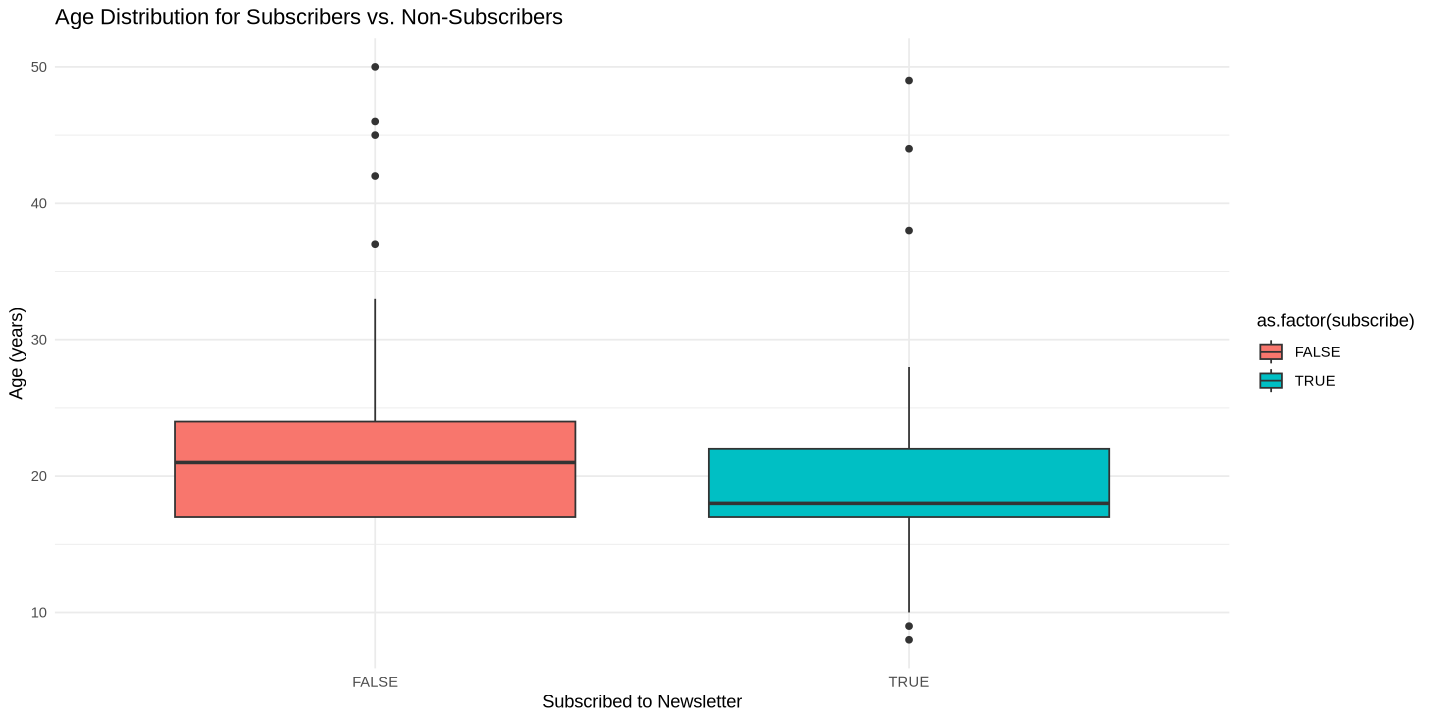

In [16]:
subscription_rate <- players %>%
  group_by(experience) %>%
  summarise(subscription_rate = mean(subscribe, na.rm = TRUE))

ggplot(subscription_rate, aes(x = experience, y = subscription_rate, fill = experience)) +
  geom_bar(stat = "identity") +
  labs(title = "Newsletter Subscription Rate by Experience Level",
       x = "Experience Level",
       y = "Subscription Rate") +
  theme_minimal()

ggplot(players, aes(x = as.factor(subscribe), y = played_hours, fill = as.factor(subscribe))) +
  geom_boxplot() +
  labs(title = "Total Played Hours for Subscribers vs. Non-Subscribers",
       x = "Subscribed to Newsletter",
       y = "Total Played Hours") +
  theme_minimal()

gender_subscription <- players %>%
  group_by(gender) %>%
  summarise(subscription_rate = mean(subscribe, na.rm = TRUE))

ggplot(gender_subscription, aes(x = gender, y = subscription_rate, fill = gender)) +
  geom_bar(stat = "identity") +
  labs(title = "Newsletter Subscription Rate by Gender",
       x = "Gender",
       y = "Subscription Rate") +
  theme_minimal()

ggplot(players, aes(x = as.factor(subscribe), y = Age, fill = as.factor(subscribe))) +
  geom_boxplot() +
  labs(title = "Age Distribution for Subscribers vs. Non-Subscribers",
       x = "Subscribed to Newsletter",
       y = "Age (years)") +
  theme_minimal()

From the graphs above, played_hours and experience have the biggest impact on newsletter subscription, while gender has a small effect. Age does not seem to matter much. Pro and Veteran players are the most likely to subscribe, while Amateur players have the lowest subscription rates, likely because they are less engaged in the game.

### Part 4 Methods and Plan
To predict whether a player subscribes to the newsletter based on their characteristics and behaviors, we propose using K-Nearest Neighbors classification. This method is suitable for binary classification problems like subscribe, where we need to determine if a player has subscribed. K-NN is a simple and flexible approach that can capture patterns in the data without making strong assumptions about relationships between variables.

K-NN relies on distance calculations, so we need to standardize numerical features like played_hours and Age to ensure fair comparisons. Choosing the right number of neighbors (k) is also important.

There are some challenges with K-NN. It is sensitive to irrelevant features, so selecting useful variables is important. It can also be slow when dealing with large datasets because it must compare new data points to all training samples. Additionally, having too many features can reduce model accuracy because distances become less meaningful.

We will split the dataset into 80% training and 20% testing to evaluate the model’s performance. Before training, we will normalize numerical features and convert categorical variables into a suitable format for K-NN. We will test different values of k and use accuracy and precision to measure how well the model performs. This structured approach will help us build a reliable and interpretable model for predicting newsletter subscription.